In [51]:
import numpy as np
import pandas as pd
from statistics import mean

In [52]:
sg_df = pd.read_csv("E:\Python\Linear\Data\Single.csv")
sg_df = sg_df.sort_values(by='x')
sg_df = sg_df.drop_duplicates(subset=['x'])
print(sg_df)

       x           y
55     0   -1.040114
106    1    0.275307
149    2   -2.819914
196    4    8.655714
231    5    5.634031
..   ...         ...
224   96   96.119825
141   97   97.108256
122   98   95.580172
195   99   99.873827
221  100  103.526616

[97 rows x 2 columns]


In [53]:
x = np.array(sg_df[['x']]).reshape(1,97)[0]
y = np.array(sg_df[['y']]).reshape(1,97)[0]
y_start = y.copy()
print(x)
print(y)

[  0   1   2   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  84  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100]
[ -1.04011421   0.27530726  -2.81991397   8.65571417   5.6340309
   2.57662538  10.41468095   9.3914168   10.80462727   8.67333636
  12.59244741  17.0761107   15.49301141  14.82248589  16.68715211
  14.86159401  17.76197116  14.99514319  19.87846479  19.87562242
  25.60926156  18.31396758  25.63476257  21.32273728  25.75612514
  21.71380347  29.31770045  26.49487961  26.48713683  24.18437976
  37.80182795  35.12724777  34.58876491  34.8534823   40.24701716
  40.00709598  38.43076389  33.37834391  41.04525583  45.44599591
  42.03835773  48.67252645  45.96396877  44.68913433  46.11021062
  52.4594668

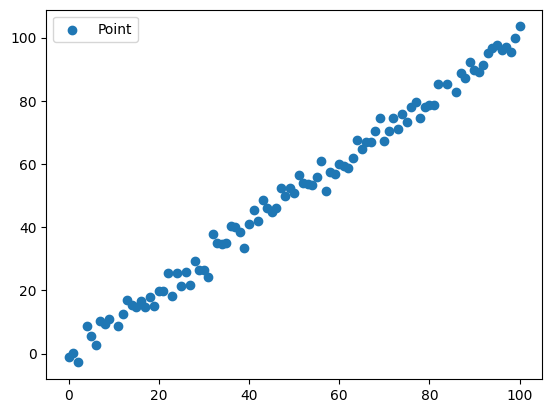

In [54]:
import matplotlib.pyplot as plt
plt.scatter(x=x,y=y, label = "Point")
plt.legend()
plt.show()


In [55]:
def iso_mean(left, right, y):
    me = mean(y[left:right+1])
    if left > 0 and me < y[left-1]:
            iso_mean(left-1, right, y)
    else:
        for i in range(left, right+1):
            y[i] = me

In [56]:
def isotonic(y):
    y_ = y.copy()
    left = 0
    right = 0
    while right<=len(y_)-1:
        if right == len(y_)-1 or y_[right]<y_[right+1]:
            if left == right:
                right+=1
                left+=1
                continue
            iso_mean(left,right,y_)
            left = right
        else:
            right+=1
    return y_

In [57]:
from sklearn.isotonic import IsotonicRegression
ir = IsotonicRegression()
ir.fit(x,y)
y_ir = ir.fit_transform(x, y)
y_iso = isotonic(y)

In [58]:
print(y_ir)
print(y_iso)


[ -1.19490697  -1.19490697  -1.19490697   5.62212348   5.62212348
   5.62212348   9.82101534   9.82101534   9.82101534   9.82101534
  12.59244741  15.78807082  15.78807082  15.78807082  15.78807082
  15.78807082  16.37855718  16.37855718  19.8770436   19.8770436
  21.96161457  21.96161457  23.47874992  23.47874992  23.7349643
  23.7349643   26.62102416  26.62102416  26.62102416  26.62102416
  35.59283073  35.59283073  35.59283073  35.59283073  38.01580524
  38.01580524  38.01580524  38.01580524  41.04525583  43.74217682
  43.74217682  46.35896004  46.35896004  46.35896004  46.35896004
  51.1708664   51.1708664   51.62388071  51.62388071  54.36364411
  54.36364411  54.36364411  54.36364411  55.81628509  56.3334724
  56.3334724   57.15599224  57.15599224  59.40391797  59.40391797
  59.40391797  61.74063192  66.25719233  66.25719233  67.01715955
  67.02150613  70.3698748   70.67655212  70.67655212  70.67655212
  72.8466555   72.8466555   74.46153507  74.46153507  77.43896215
  77.43896215

In [59]:
print(y_ir == y_iso)

[ True  True  True False False False  True  True  True  True  True False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
  True False False False  True  True  True  True  True  True  True  True
  True]


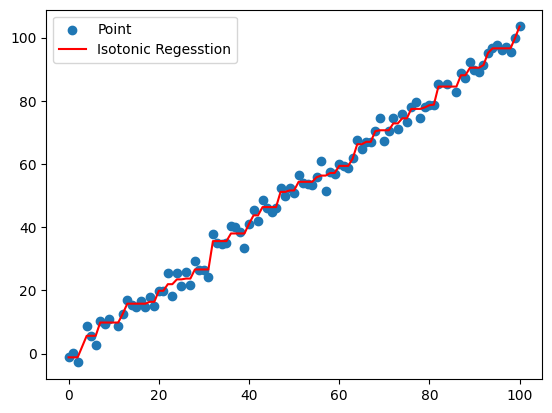

In [60]:
plt.scatter(x=x,y=y_start, label = "Point")
plt.plot(x,y_iso,'r-', label = "Isotonic Regesstion")
plt.legend()
plt.show()
